,Name,KMin,FastDrop,JitterValue,CompletionTime,X_Label
3,VersionA,20,0,34,90,VersionA 20 34
0,VersionA,20,1,34,99,VersionA 20 34
5,VersionA,50,1,34,22,VersionA 50 34
1,VersionA,50,0,34,30,VersionA 50 34
6,VersionD,20,1,76,70,VersionD 20 76
7,VersionD,20,0,76,71,VersionD 20 76
2,VersionD,50,1,76,25,VersionD 50 76
4,VersionD,50,0,76,50,VersionD 50 76


[Text(0.17500000000000002, 0, 'VersionA 50 34'),
 Text(1.075, 0, 'VersionD 50 76'),
 Text(1.9749999999999999, 0, 'VersionD 20 76'),
 Text(2.8750000000000004, 0, 'VersionA 20 34')]

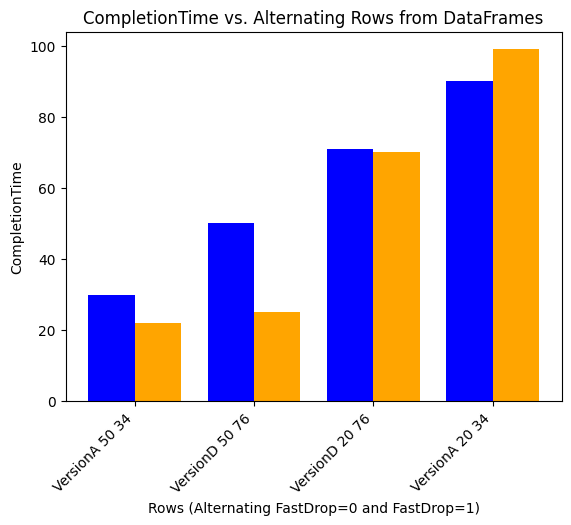

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the original DataFrame with the specified columns and adding the rows
columns = ["Name", "KMin", "FastDrop", "JitterValue", "CompletionTime"]
data = [
    ["VersionA", 20, 1, 34, 99],
    ["VersionA", 50, 0, 34, 30],
    ["VersionD", 50, 1, 76, 25],
    ["VersionA", 20, 0, 34, 90],
    ["VersionD", 50, 0, 76, 50],
    ["VersionA", 50, 1, 34, 22],
    ["VersionD", 20, 1, 76, 70],
    ["VersionD", 20, 0, 76, 71],
]
df = pd.DataFrame(data, columns=columns)

# Sort the DataFrame by "CompletionTime"
df.sort_values(by="CompletionTime", inplace=True)

# Create a string combination of the other columns for x-axis
df["X_Label"] = df[["Name", "KMin", "JitterValue"]].astype(str).agg(' '.join, axis=1)

# Creating the bar plot manually, alternating colors for FastDrop==0 and FastDrop==1
fig, ax = plt.subplots()

# Get the unique values of X_Label
x_labels_unique = df["X_Label"].unique()

# Calculate the number of bars for each group (FastDrop=0 and FastDrop=1)
num_bars_per_group = df["FastDrop"].nunique()

df.sort_values(by="X_Label", inplace=True)
# Calculate the total width of each group of bars
group_width = 0.8

# Calculate the spacing between each pair of bars
spacing = 0.1

# Calculate the width of each bar within a group
bar_width = (group_width - spacing) / num_bars_per_group
display(df)

# Plot the bars for FastDrop == 0
for idx, x_label in enumerate(x_labels_unique):
    df_subset = df[(df["X_Label"] == x_label) & (df["FastDrop"] == 0)]
    ax.bar([pos + idx * (group_width + spacing) for pos in range(len(df_subset))], df_subset["CompletionTime"], width=bar_width, color="blue", label="FastDrop == 0" if idx == 0 else "")

# Plot the bars for FastDrop == 1 with a small offset
for idx, x_label in enumerate(x_labels_unique):
    df_subset = df[(df["X_Label"] == x_label) & (df["FastDrop"] == 1)]
    ax.bar([pos + idx * (group_width + spacing) + bar_width for pos in range(len(df_subset))], df_subset["CompletionTime"], width=bar_width, color="orange", label="FastDrop == 1" if idx == 0 else "")

plt.xlabel("Rows (Alternating FastDrop=0 and FastDrop=1)")
plt.ylabel("CompletionTime")
plt.title("CompletionTime vs. Alternating Rows from DataFrames")

# Set the x-axis tick positions and labels
my_pos = []
for idx, x_label in enumerate(x_labels_unique):
    my_pos.append([pos + idx * (group_width + spacing) + bar_width for pos in range(len(df_subset))][0] - (bar_width / 2))
ax.set_xticks(my_pos)
ax.set_xticklabels(x_labels_unique, rotation=45, ha='right')


In [10]:

# Show the legend
ax.legend()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>